# Substitution Ciphers

In [69]:
from collections import Counter
import matplotlib.pyplot as plt
import pickle

## Introduction

Substitution ciphers are a fundamental concept in cryptography, where elements of plaintext are systematically replaced with other elements according to a defined scheme. This assignment explores the implementation and analysis of substitution ciphers, emphasizing their strengths and weaknesses in cryptographic security.

Our focus was on two classical ciphers:  
- **Caesar cipher**, a simple shift-based substitution cipher.  
- **Simple substitution cipher**, where each letter is replaced by a unique, randomly assigned counterpart.

To analyze these ciphers, we worked with the following datasets:  
- **ciphertext_caesar.txt**: Used to test and break the Caesar cipher.  
- **ciphertext_simple.txt**: An encrypted text that we deciphered using letter frequency analysis.  
- **wikipedia_cybersecurity.txt**: Used as a reference to extract real-world English letter frequency distributions, helping to break the simple substitution cipher.

Our objective was to **evaluate the security of these encryption methods** by implementing decryption strategies such as **brute-force attacks, frequency analysis, and manual refinement techniques**. By demonstrating the weaknesses in these classical ciphers, this report highlights the importance of modern encryption techniques in ensuring secure communication.

## Caesar Cipher

The Caesar cipher is a simple substitution cipher where each letter in the plaintext is shifted by a fixed number of positions in the alphabet. It is one of the earliest known encryption techniques, attributed to Julius Caesar, who used it to protect military messages.

Mathematically, the transformation is defined as:

\[
C = (P + k) \mod 26
\]

where:
- \( C \) is the ciphertext character,
- \( P \) is the plaintext character,
- \( k \) is the shift key,
- and modulo 26 ensures wrapping around the alphabet.

This encryption method is easy to implement but highly vulnerable to brute force attacks, as there are only 25 possible shift keys. It can also be broken through frequency analysis, as the letter distribution remains unchanged.

*Below is the implementation of the Caesar cipher:*


### Encryption

In [70]:
def caesar_encrypt(plaintext, shift=0):
    ciphertext = "" 
    
    for char in plaintext: 
        if char.isalpha():  
            base = ord('A') if char.isupper() else ord('a') 
            
            
            new_char = chr((ord(char) - base + shift) % 26 + base)
        else:
            new_char = char  
        
        ciphertext += new_char  

    return ciphertext

In [71]:
# code snippet to test the implementation of the encryption function
plaintext = 'hello!' 
ciphertext = caesar_encrypt(plaintext, shift=4)

print(plaintext, '->', ciphertext) # expected output 'hello! -> lipps!'

hello! -> lipps!


### Decryption

In [72]:
def caesar_decrypt(ciphertext, shift=0):
    ''' Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int) '''
    plaintext = ""  
    
    for char in ciphertext:
        if char.isalpha(): 
            base = ord('A') if char.isupper() else ord('a')  
            
            
            new_char = chr((ord(char) - base - shift) % 26 + base)
        else:
            new_char = char  
        
        plaintext += new_char 

    return plaintext 


In [73]:
# code snippet to test the implementation of the decryption function
ciphertext = 'lipps!' # 'hello!' encoded with shift=4
plaintext = caesar_decrypt(ciphertext, shift=4)

print(ciphertext, '->', plaintext)  # expected output 'lipps! -> hello!'

lipps! -> hello!


### Ciphertext

In [74]:
with open('ciphertext_caesar.txt', 'r') as file:
    ciphertext = file.read()  

print(ciphertext)

jgew (alsdasf sfv dslaf: jges, hjgfgmfuwv [ˈjgːes] ) ak lzw ushalsd ualq gx alsdq. al ak sdkg lzw ushalsd gx lzw dsrag jwyagf, lzw uwfljw gx lzw ewljghgdalsf ualq gx jgew ushalsd, sfv s khwuasd ugemfw (emfauahsdalq) fsewv ugemfw va jges ushalsdw. oalz 2,860,009 jwkavwflk af 1,285 ce2 (496.1 ki ea), jgew ak lzw ugmfljq'k egkl hghmdslwv ugemfw sfv lzw lzajv egkl hghmdgmk ualq af lzw wmjghwsf mfagf tq hghmdslagf oalzaf ualq daealk. lzw ewljghgdalsf ualq gx jgew, oalz s hghmdslagf gx 4,355,725 jwkavwflk, ak lzw egkl hghmdgmk ewljghgdalsf ualq af alsdq. alk ewljghgdalsf sjws ak lzw lzajv-egkl hghmdgmk oalzaf alsdq. jgew ak dguslwv af lzw uwfljsd-owklwjf hgjlagf gx lzw alsdasf hwfafkmds, oalzaf dsrag (dslame), sdgfy lzw kzgjwk gx lzw latwj nsddwq. nslausf ualq (lzw kesddwkl ugmfljq af lzw ogjdv sfv zwsvimsjlwjk gx lzw ogjdvoavw uslzgdau uzmjuz mfvwj lzw ygnwjfsfuw gx lzw zgdq kww) ak sf afvwhwfvwfl ugmfljq afkavw lzw ualq tgmfvsjawk gx jgew, lzw gfdq wpaklafy wpsehdw gx s ugmfljq oalzaf s ua

### Brute Force Attack

#### Breaking the Caesar Cipher

Due to its limited key space (only 25 possible shifts), the Caesar cipher is highly vulnerable to brute force attacks. The decryption process follows these steps:

##### Procedure:

1. **Iterate Through All Possible Shifts**  
   - Since there are only 25 possible shifts, we systematically test each shift value from 1 to 25.  
   - For each shift \( k \), we decrypt the ciphertext using the **caesar_decrypt** function.

2. **Check for Common English Words**  
   - For each decrypted attempt, we count the occurrences of frequently used English words such as "the," "and," "of," etc.  
   - The assumption is that the correct plaintext will contain the highest number of recognizable words.

3. **Determine the Best Shift Value**  
   - The shift that results in the maximum number of matches with common words is selected as the most likely key.

4. **Decrypt the Ciphertext Using the Identified Shift**  
   - Once the shift value is determined, we use it to fully decrypt the message.


In [75]:
common_words = ["the", "and", "of", "to", "in", "that", "is", "was", "he", "for", "it", "with", "as", "his", "on", "be"]

def infer_shift_with_words(ciphertext):
    best_shift = 0
    max_word_matches = 0

    for shift in range(26):  
        decrypted_attempt = caesar_decrypt(ciphertext, shift)
        word_count = sum(decrypted_attempt.count(word) for word in common_words)

        if word_count > max_word_matches:
            max_word_matches = word_count
            best_shift = shift

    return best_shift

shift_value = infer_shift_with_words(ciphertext)


In [76]:
decrypted_text = caesar_decrypt(ciphertext, shift_value)
print("Key (Shift):", shift_value)
print("Decrypted Plaintext:\n", decrypted_text)


Key (Shift): 18
Decrypted Plaintext:
 rome (italian and latin: roma, pronounced [zrohma] ) is the capital city of italy. it is also the capital of the lazio region, the centre of the metropolitan city of rome capital, and a special comune (municipality) named comune di roma capitale. with 2,860,009 residents in 1,285 km2 (496.1 sq mi), rome is the country's most populated comune and the third most populous city in the european union by population within city limits. the metropolitan city of rome, with a population of 4,355,725 residents, is the most populous metropolitan city in italy. its metropolitan area is the third-most populous within italy. rome is located in the central-western portion of the italian peninsula, within lazio (latium), along the shores of the tiber valley. vatican city (the smallest country in the world and headquarters of the worldwide catholic church under the governance of the holy see) is an independent country inside the city boundaries of rome, the only exi

## Simple Substitution Cipher

The simple substitution cipher is an improvement over the Caesar cipher, where each letter in the plaintext is replaced with a unique, randomly chosen letter from the alphabet. Unlike the Caesar cipher, which follows a fixed shift pattern, this method increases security by introducing a completely randomized mapping.

Since each letter is mapped uniquely, the number of possible keys is **26! (factorial)**, making brute-force attacks impractical. However, this cipher is still vulnerable to **frequency analysis** since the structure of the plaintext remains largely unchanged.

A substitution cipher can be represented mathematically as a bijective function:

\[
C = f(P)
\]

where:
- \( C \) is the ciphertext character,
- \( P \) is the plaintext character,
- \( f \) is a randomly generated one-to-one function mapping each letter to another.

### Encryption

In [77]:
def substitution_encrypt(plaintext, mapping):
    ciphertext = ''.join(mapping.get(char, char) for char in plaintext)
    return ciphertext

In [78]:
def substitution_encrypt(plaintext, mapping):
    ciphertext = ''.join(mapping.get(char, char) for char in plaintext)
    return ciphertext

plaintext = 'hello!'
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}

ciphertext = substitution_encrypt(plaintext, mapping)

print(plaintext, '->', ciphertext)

hello! -> apwwq!


### Decryption

In [79]:
def substitution_decrypt(ciphertext, mapping):

    reverse_mapping = {v: k for k, v in mapping.items()}

    plaintext = ''.join(reverse_mapping.get(char, char) for char in ciphertext)
    
    return plaintext


ciphertext = 'apwwq!'
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}

plaintext = substitution_decrypt(ciphertext, mapping)

print(ciphertext, '->', plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> hello!


In [80]:
# code snippet to test the implementation of the decryption function
mapping = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}  # previous mapping 
ciphertext = 'apwwq!'

plaintext = substitution_decrypt(ciphertext, mapping)

print(ciphertext, '->', plaintext)  # expected output 'apwwq! -> hello!'

apwwq! -> hello!


### Ciphertext

In [81]:
with open('ciphertext_simple.txt', 'r') as file:
    ciphertext = file.read()  

print(ciphertext)

vf pseygdtsbyce, b lxolgvgxgvdf pvycms vl b kmgcdj dr mfpseygvft vf ucvpc xfvgl dr ywbvfgmng bsm smywbpmj uvgc gcm pvycmsgmng, vf b jmrvfmj kbffms, uvgc gcm cmwy dr b qme; gcm "xfvgl" kbe om lvftwm wmggmsl (gcm kdlg pdkkdf), ybvsl dr wmggmsl, gsvywmgl dr wmggmsl, kvngxsml dr gcm bodam, bfj ld rdsgc. gcm smpmvams jmpvycmsl gcm gmng oe ymsrdskvft gcm vfamslm lxolgvgxgvdf ysdpmll gd mngsbpg gcm dsvtvfbw kmllbtm.
lxolgvgxgvdf pvycmsl pbf om pdkybsmj uvgc gsbflydlvgvdf pvycmsl. vf b gsbflydlvgvdf pvycms, gcm xfvgl dr gcm ywbvfgmng bsm smbssbftmj vf b jvrrmsmfg bfj xlxbwwe hxvgm pdkywmn dsjms, oxg gcm xfvgl gcmklmwaml bsm wmrg xfpcbftmj. oe pdfgsblg, vf b lxolgvgxgvdf pvycms, gcm xfvgl dr gcm ywbvfgmng bsm smgbvfmj vf gcm lbkm lmhxmfpm vf gcm pvycmsgmng, oxg gcm xfvgl gcmklmwaml bsm bwgmsmj.
gcmsm bsm b fxkoms dr jvrrmsmfg geyml dr lxolgvgxgvdf pvycms. vr gcm pvycms dymsbgml df lvftwm wmggmsl, vg vl gmskmj b lvkywm lxolgvgxgvdf pvycms; b pvycms gcbg dymsbgml df wbstms tsdxyl dr wmggmsl vl gm

### Frequency Analysis Attack

#### Breaking a Simple Substitution Cipher  

Since brute-force attacks are infeasible due to the large key space, we use **frequency analysis** to infer the correct letter mappings.

##### Procedure:

1. **Extract Letter Frequency from the Reference Text**  
   - Analyze **wikipedia_cybersecurity.txt** to determine letter frequency distributions in real-world English text.  
   - This dataset provides a more accurate frequency reference compared to predefined letter frequencies.

2. **Visualize Frequency Distribution of the Reference Text**  
   - Generate a **bar graph** displaying the letter frequency distribution from **wikipedia_cybersecurity.txt**.  
   - This helps in understanding typical letter occurrences in natural text.

3. **Store Reference Text Data Using Pickle**  
   - Save extracted letter frequencies from **wikipedia_cybersecurity.txt** using the `pickle` module.  
   - This allows for easy reloading of frequency data without recomputing it.

4. **Analyze Letter Frequency in the Ciphertext**  
   - Compute letter frequencies for **ciphertext_simple.txt**.  
   - Compare this distribution to the reference text statistics to infer letter substitutions.

5. **Estimate Letter Mappings**  
   - Assign the most frequent letter in the ciphertext to the most frequent letter in the reference text.  
   - Continue this mapping process for all letters based on their relative frequencies.

6. **Reconstruct the Plaintext**  
   - Apply the inferred letter mappings to the ciphertext to obtain the decrypted message.


#### English Letters Distribution

In [82]:
def letter_distribution(text):
    ''' Return the distribution of the letters in `text` (str) '''
    
    text = ''.join([char for char in text if char.isalpha()]).lower()

    # Count the frequency of each letter
    letter_count = Counter(text)

    # Get the total number of letters
    total_letters = sum(letter_count.values())

    # Calculate the frequency of each letter
    distribution = {letter: count / total_letters for letter, count in letter_count.items()}

    # Sort the distribution by frequency
    sorted_distribution = dict(sorted(distribution.items(), key=lambda item: item[1], reverse=True))

    return sorted_distribution


In [83]:
# code snippet to test the implementation of `letter_distribution`
text = 'hello world!'

letter_distribution(text)
# expected ouput: 
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}

{'l': 0.3, 'o': 0.2, 'h': 0.1, 'e': 0.1, 'w': 0.1, 'r': 0.1, 'd': 0.1}

In [84]:
# Load English text to estimate letter distribution
with open('wikipedia_cybersecurity.txt', 'r') as file:
    english_text = file.read()

print("English Text:", english_text)


English Text: Computer security (also cybersecurity, digital security, or information technology (IT) security) is the protection of computer software, systems and networks from threats that can lead to unauthorized information disclosure, theft or damage to hardware, software, or data, as well as from the disruption or misdirection of the services they provide.
The significance of the field stems from the expanded reliance on computer systems, the Internet, and wireless network standards. Its importance is further amplified by the growth of smart devices, including smartphones, televisions, and the various devices that constitute the Internet of things (IoT). Cybersecurity has emerged as one of the most significant new challenges facing the contemporary world, due to both the complexity of information systems and the societies they support. Security is particularly crucial for systems that govern large-scale systems with far-reaching physical effects, such as power distribution, elect

In [85]:
english_distribution = letter_distribution(english_text)

print("English Letter Distribution:", english_distribution)


English Letter Distribution: {'e': 0.12123025520190497, 't': 0.09365299023824662, 'a': 0.08335515078979193, 'i': 0.07760780940270037, 's': 0.07490244480183517, 'n': 0.0730199099874082, 'o': 0.07128698058869731, 'r': 0.06936704442034135, 'c': 0.049220181770580095, 'l': 0.03511987133934248, 'd': 0.034820660507910384, 'h': 0.031479472890251964, 'u': 0.02767700190746905, 'm': 0.026729500941267408, 'p': 0.02296443131241351, 'f': 0.020134395531784918, 'y': 0.01921182880153595, 'g': 0.01828926207128698, 'b': 0.014137711785166623, 'v': 0.011482215656206754, 'w': 0.011370011594419718, 'k': 0.008315567690217053, 'x': 0.0015957911009711885, 'z': 0.0014711199212078144, 'j': 0.0008726982583436187, 'q': 0.0006233558988168705, 'ó': 3.740135392901223e-05, 'à': 1.246711797633741e-05, 'ś': 1.246711797633741e-05}


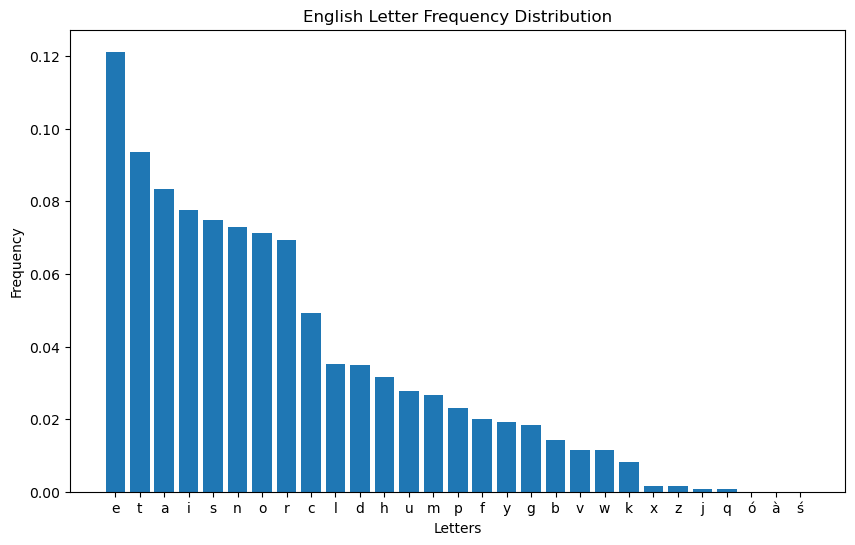

In [86]:
# Plot the English letter distribution
letters = list(english_distribution.keys())
frequencies = list(english_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(letters, frequencies)
plt.title("English Letter Frequency Distribution")
plt.xlabel("Letters")
plt.ylabel("Frequency")
plt.show()


In [87]:
with open('english_distribution.pkl', 'wb') as f:
    pickle.dump(english_distribution, f)

print("English distribution saved to 'english_distribution.pkl'")


English distribution saved to 'english_distribution.pkl'


#### Perform attack

In [88]:
ciphertext_distribution = letter_distribution(ciphertext)

# Sort the ciphertext and English distributions by frequency
sorted_ciphertext = sorted(ciphertext_distribution.items(), key=lambda x: x[1], reverse=True)
sorted_english = sorted(english_distribution.items(), key=lambda x: x[1], reverse=True)

# Create a mapping of ciphertext letters to English letters based on frequency
ciphertext_letters = [item[0] for item in sorted_ciphertext]
english_letters = [item[0] for item in sorted_english]

# Create the substitution mapping
substitution_mapping = {ciphertext_letters[i]: english_letters[i] for i in range(len(ciphertext_letters))}


In [89]:
print("Substitution Mapping:", substitution_mapping)

Substitution Mapping: {'m': 'e', 'g': 't', 'b': 'a', 'v': 'i', 'l': 's', 'f': 'n', 's': 'o', 'd': 'r', 'c': 'c', 'w': 'l', 'p': 'd', 'j': 'h', 'y': 'u', 'x': 'm', 'k': 'p', 'o': 'f', 'r': 'y', 'e': 'g', 't': 'b', 'u': 'v', 'a': 'w', 'q': 'k', 'n': 'x', 'h': 'z', 'i': 'j', 'è': 'q', 'z': 'ó', 'é': 'à', 'ñ': 'ś'}


In [90]:
def substitution_decrypt(ciphertext, mapping):
    ''' Decrypt `ciphertext` using the substitution mapping '''
    # Decrypt the ciphertext by replacing each letter with its mapped letter
    plaintext = ''.join([mapping.get(char, char) for char in ciphertext])  # Leave non-letter characters unchanged
    return plaintext

# Decrypt the ciphertext
plaintext = substitution_decrypt(ciphertext, substitution_mapping)

# Print the decrypted plaintext
print("Decrypted Plaintext:", plaintext[:1000])  # Show the first 1000 characters to check


Decrypted Plaintext: in dogutrboaucg, a smfstitmtirn diuceo is a petcrh ry endogutinb in vcidc mnits ry ulaintext aoe oeuladeh vitc tce diuceotext, in a heyineh panneo, vitc tce celu ry a keg; tce "mnits" pag fe sinble letteos (tce prst drpprn), uaios ry letteos, toiulets ry letteos, pixtmoes ry tce afrwe, anh sr yrotc. tce oedeiweo hediuceos tce text fg ueoyropinb tce inweose smfstitmtirn uordess tr extoadt tce roibinal pessabe.
smfstitmtirn diuceos dan fe drpuaoeh vitc toansursitirn diuceos. in a toansursitirn diuceo, tce mnits ry tce ulaintext aoe oeaooanbeh in a hiyyeoent anh msmallg zmite drpulex roheo, fmt tce mnits tcepselwes aoe leyt mndcanbeh. fg drntoast, in a smfstitmtirn diuceo, tce mnits ry tce ulaintext aoe oetaineh in tce sape sezmende in tce diuceotext, fmt tce mnits tcepselwes aoe alteoeh.
tceoe aoe a nmpfeo ry hiyyeoent tgues ry smfstitmtirn diuceo. iy tce diuceo rueoates rn sinble letteos, it is teopeh a sipule smfstitmtirn diuceo; a diuceo tcat rueoates rn laobeo bo

### Refining Decryption with Manual Word Adjustments  
The statistical frequency analysis provided a rough decryption, but it was not fully accurate. This is because letter frequency varies between different texts, and shorter ciphertexts do not always follow expected statistical patterns.

One clear issue was with the word **"ywbvfgmng"**, which frequency analysis initially decrypted as **"ulaintext"**. However, after reviewing the text, it became obvious that the correct word should be **"plaintext"**. 

Realizing this, we manually adjusted the mappings for other words:
- **"smfstitmtirn"** looked similar to **"substitution"**, prompting further changes.
- **"pvycms"** was decrypted incorrectly (**"dipceo"**) but matched **"cipher"** after refinement.
- **"pseygdtsbyce"** was initially mapped incorrectly  (**"crgptobraphg"**)but corresponded to **"cryptography"** when adjusted.

By iteratively modifying our letter replacements based on recognizable words, not only did we improve the decryption accuracy, but we also successfully decrypted the entire text.

*Below is the implementation of the manual refinement process:*

In [91]:
new_substitution_mapping = substitution_mapping.copy()

new_substitution_mapping['y'] = 'p' # ywbvfgmng -> ulaintext -> plaintext 
new_substitution_mapping['x'] = 'u' # lxolgvgxgvdf -> smfstitmtirn -> substitution
new_substitution_mapping['o'] = 'b' 
new_substitution_mapping['d'] = 'o' 
new_substitution_mapping['p'] = 'c' # pvycms -> dipceo -> cipher
new_substitution_mapping['c'] = 'h'
new_substitution_mapping['s'] = 'r'
new_substitution_mapping['e'] = 'y' # pseygdtsbyce -> crgptobraphg -> cypthography
new_substitution_mapping['t'] = 'g' 
new_substitution_mapping['r'] = 'f' # dr -> oy -> of
new_substitution_mapping['u'] = 'w' # ucvpc -> vhich -> which 
new_substitution_mapping['j'] = 'd' # smywbpmj -> replaceh -> replaced
new_substitution_mapping['k'] = 'm' # kmgcdj -> pethod  -> method
new_substitution_mapping['a'] = 'v' # jvlpdamsmj -> discowered -> discovered
new_substitution_mapping['h'] = 'q' # rsmhxmfpe -> frezuency -> frequency 

new_substitution_mapping.update()

new_plaintext = substitution_decrypt(ciphertext, new_substitution_mapping)

print("Updated Decrypted Plaintext:", new_plaintext) 
print("Correct mapping: ", new_substitution_mapping)


Updated Decrypted Plaintext: in cryptography, a substitution cipher is a method of encrypting in which units of plaintext are replaced with the ciphertext, in a defined manner, with the help of a key; the "units" may be single letters (the most common), pairs of letters, triplets of letters, mixtures of the above, and so forth. the receiver deciphers the text by performing the inverse substitution process to extract the original message.
substitution ciphers can be compared with transposition ciphers. in a transposition cipher, the units of the plaintext are rearranged in a different and usually quite complex order, but the units themselves are left unchanged. by contrast, in a substitution cipher, the units of the plaintext are retained in the same sequence in the ciphertext, but the units themselves are altered.
there are a number of different types of substitution cipher. if the cipher operates on single letters, it is termed a simple substitution cipher; a cipher that operates on l

## Affine cipher

The **Affine Cipher** is a type of monoalphabetic substitution cipher that applies a **mathematical transformation** to each letter in the plaintext. It is defined by the encryption function:

\[
E(x) = (a \cdot x + b) \mod 26
\]

where **x** is the letter's numerical position (0–25), **a** and **b** are the cipher keys, and **a** must be coprime with 26 to ensure invertibility.  

Decryption is performed using the modular inverse of **a**, given by:

\[
D(y) = a^{-1} \cdot (y - b) \mod 26
\]

While the Affine Cipher improves upon the **Caesar Cipher**, it remains vulnerable to **brute-force attacks**, **frequency analysis**, and **modular inversion attacks**, making it insecure for modern cryptographic applications.  

The following implementation demonstrates **encryption, decryption, and cryptanalysis** of the Affine Cipher.


### Encryption

In [92]:
from math import gcd

In [93]:
def affine_encrypt(plaintext, a, b):
    ''' Encrypt `plaintext` (str) as an affine cipher with given `a` and `b` '''
    if gcd(a, 26) != 1:
        raise ValueError("a must be coprime with 26 for the cipher to work.")

    ciphertext = ''
    for char in plaintext:
        if char.isalpha():
            is_upper = char.isupper()
            x = ord(char.lower()) - ord('a')  # Convert letter to number (0-25)
            encrypted_num = (a * x + b) % 26  # Apply affine transformation
            encrypted_char = chr(encrypted_num + ord('a'))  # Convert back to letter
            ciphertext += encrypted_char.upper() if is_upper else encrypted_char
        else:
            ciphertext += char  # Keep non-alphabetic characters unchanged
    return ciphertext


In [94]:
plaintext = 'hello world!'
a, b = 3, 1

ciphertext = affine_encrypt(plaintext, a, b)
print(plaintext, '->', ciphertext) # expected output 'hello world! -> wniir praik!'

hello world! -> wniir praik!


### Decryption

In [95]:
def affine_decrypt(ciphertext, a, b):
    ''' Decrypt `ciphertext` (str) as an affine cipher with given `a` and `b` '''
    
    # Function to compute modular inverse of 'a' mod 26
    def mod_inverse(a, m=26):
        for i in range(m):
            if (a * i) % m == 1:
                return i
        raise ValueError(f"No modular inverse for a={a}. Decryption not possible.")  # Prevent crashes

    if gcd(a, 26) != 1:
        raise ValueError("a must be coprime with 26 for the cipher to work.")

    a_inv = mod_inverse(a, 26)  # Find modular inverse of a

    plaintext = ''
    for char in ciphertext:
        if char.isalpha():
            is_upper = char.isupper()
            y = ord(char.lower()) - ord('a')  # Convert letter to number (0-25)
            decrypted_num = (a_inv * (y - b)) % 26  # Apply inverse affine transformation
            decrypted_char = chr(decrypted_num + ord('a'))  # Convert back to letter
            plaintext += decrypted_char.upper() if is_upper else decrypted_char
        else:
            plaintext += char  # Keep non-alphabetic characters unchanged
    return plaintext


In [96]:
ciphertext = 'wniir praik!'
a, b = 3, 1

plaintext = affine_decrypt(ciphertext, a, b)
print(ciphertext, '->', plaintext) # expected output 'wniir praik! -> hello world!'

wniir praik! -> hello world!


### Ciphertext

In [97]:
with open("ciphertext_affine.txt", "r") as file:
    ciphertext = file.read().strip()

print("Ciphertext from file:", ciphertext[:100])  # Print first 100 characters to preview

Ciphertext from file: yir doofqr xfkire fb d yjkr no tnqndwkidaryfx bvabyfyvyfnq xfkire, pirer rdxi wryyre fq dq dwkidary 


In [98]:
# Load English letter frequency distribution from pickle file
with open("english_distribution.pkl", "rb") as file:
    english_freq = pickle.load(file)  # Load as a dictionary

In [99]:
# Count letter occurrences in ciphertext
ciphertext_freq = Counter([char.lower() for char in ciphertext if char.isalpha()])

# Sort letters by frequency in ciphertext
sorted_ciphertext = [pair[0] for pair in ciphertext_freq.most_common()]

# Sort English letters by expected frequency (descending)
sorted_english = sorted(english_freq.keys(), key=lambda k: english_freq[k], reverse=True)

# Print the frequency analysis results
print("Most common letters in ciphertext:", sorted_ciphertext[:5])
print("Most common letters in English:", sorted_english[:5])

Most common letters in ciphertext: ['r', 'y', 'f', 'd', 'q']
Most common letters in English: ['e', 't', 'a', 'i', 's']


In [100]:
# Map most common letters in ciphertext to most common in English
probable_mappings = list(zip(sorted_ciphertext, sorted_english))

# Use top two mappings to estimate 'a' and 'b'
x1, y1 = ord(probable_mappings[0][1]) - ord('a'), ord(probable_mappings[0][0]) - ord('a')
x2, y2 = ord(probable_mappings[1][1]) - ord('a'), ord(probable_mappings[1][0]) - ord('a')

# Solve for 'a' using modular arithmetic
a_candidates = [a for a in range(1, 26, 2) if gcd(a, 26) == 1 and (a * (x1 - x2)) % 26 == (y1 - y2) % 26]

print("Possible values for 'a':", a_candidates)

Possible values for 'a': [23]


### Breaking Cipher

In [101]:
# Try each candidate 'a' to find valid 'b'
for a in a_candidates:
    b = (y1 - a * x1) % 26
    decrypted_text = affine_decrypt(ciphertext, a, b)
    if decrypted_text:
        print(f"Possible decryption with a={a}, b={b}: {decrypted_text}...\n")


Possible decryption with a=23, b=3: the affine cipher is a type of monoalphabetic substitution cipher, where each letter in an alphabet is mapped to its numeric equivalent, encrypted using a simple mathematical function, and converted back to a letter. the formula used means that each letter encrypts to one other letter, and back again, meaning the cipher is essentially a standard substitution cipher with a rule governing which letter goes to which. as such, it has the weaknesses of all substitution ciphers. each letter is enciphered with the function (ax + b) mod 26, where b is the magnitude of the shift.


== description ==
here, the letters of an alphabet of size m are first mapped to the integers in the range 0 ... m  1. it then uses modular arithmetic to transform the integer that each plaintext letter corresponds to into another integer that correspond to a ciphertext letter.
the encryption function for a single letter is 

  
    
      
        e
        (
        x
        )
 

## Conclusion

## Conclusion

In this report, we analyzed three classical substitution ciphers: the **Caesar cipher**, the **simple substitution cipher**, and the **Affine cipher**, exploring their vulnerabilities through cryptanalysis techniques.

For the **Caesar cipher**, we successfully decrypted the text using a **brute-force attack** combined with **word-matching analysis**. By comparing decrypted outputs to common English words, we efficiently identified the correct shift and reconstructed the plaintext.

For the **simple substitution cipher**, we initially applied **frequency analysis** using a reference dataset (**wikipedia_cybersecurity.txt**) to estimate letter mappings. While this approach provided a rough decryption, it was not entirely accurate due to variations in letter distribution and the ciphertext's limited length. To improve accuracy, we **manually refined the decryption**, identifying incorrect mappings and adjusting letter assignments based on recognizable words. This demonstrated that while **frequency analysis is a powerful tool, it often requires contextual refinements** for optimal accuracy.

For the **Affine cipher**, we examined its security properties and performed a **cryptanalysis attack** to decrypt the ciphertext without knowing the key. The Affine Cipher extends the **Caesar Cipher** by introducing an additional multiplicative step, making it slightly more secure. However, it remains vulnerable to:
- **Brute-force attacks**, as the number of valid keys is limited.
- **Frequency analysis**, since it preserves letter distribution patterns.
- **Mathematical inversion attacks**, as the decryption process relies on computing the modular inverse of the key parameter.

### Key Takeaways:
- The **Caesar cipher is trivial to break** using brute-force attacks due to its small key space.  
- The **simple substitution cipher is more secure** but remains vulnerable to **statistical attacks**.  
- The **Affine cipher, while more complex than the Caesar cipher, is still easily broken** using frequency analysis and modular arithmetic techniques.  
- **Frequency analysis provides a strong foundation**, but manual refinement is often required for full decryption.  
- This study highlights the **limitations of classical cryptographic methods** and the importance of stronger encryption techniques.  

Ultimately, our findings reinforce why **modern encryption standards, such as AES and RSA, are necessary** for secure communication. These algorithms eliminate predictable patterns and rely on **complex mathematical principles** to provide robust security.


## References


- **Frequency Analysis: Breaking the Code**: An overview of using frequency analysis to decrypt monoalphabetic substitution ciphers. [https://crypto.interactive-maths.com/frequency-analysis-breaking-the-code.html](https://crypto.interactive-maths.com/frequency-analysis-breaking-the-code.html)

- **Hacking the Caesar Cipher with the Brute-Force Technique**: A tutorial on decrypting Caesar ciphers using brute-force methods. [https://inventwithpython.com/hacking/chapter7.html](https://inventwithpython.com/hacking/chapter7.html)

- **Frequency Analysis Tool - Online Letter Ngram Counter/Analyzer**: An online tool for performing frequency analysis on ciphertexts. [https://www.dcode.fr/frequency-analysis](https://www.dcode.fr/frequency-analysis)

- **Frequency Analysis - 101 Computing**: An introduction to frequency analysis and its application in breaking substitution ciphers. [https://www.101computing.net/frequency-analysis/](https://www.101computing.net/frequency-analysis/)

- **Affine Cipher Explained**: A detailed explanation of the Affine Cipher, including encryption, decryption, and mathematical properties.  
  [https://crypto.interactive-maths.com/affine-cipher.html](https://crypto.interactive-maths.com/affine-cipher.html)  

- **Breaking the Affine Cipher Using Frequency Analysis**: A guide on how to attack the Affine Cipher using statistical techniques.  
  [https://www.dcode.fr/affine-cipher](https://www.dcode.fr/affine-cipher)  

- **Modular Arithmetic in Cryptography**: An overview of modular arithmetic and its role in cryptographic algorithms, including the Affine Cipher.  
  [https://crypto.stackexchange.com/questions/54520/how-does-the-affine-cipher-work](https://crypto.stackexchange.com/questions/54520/how-does-the-affine-cipher-work)  
